# 01. Data Cleaning

#### Import and clean the data files  - companies.csv and round2.csv

In [3]:
## import all the necessary python libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import sys;

In [4]:
## Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
## Read companies.csv and round2.csv
df_companies = pd.read_csv('companies.csv',engine='python')
df_rounds = pd.read_csv('rounds2.csv', engine='python')

In [6]:
## Lookig at companies head
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
## Looking at rounds head
df_rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
## Check the companies dataframe info-
df_companies.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


In [9]:
## Check the shape of company data frame
df_companies.shape

(66368, 10)

In [10]:
## it looks like the permalink has the unique values - since the not null count = total number of entries
df_companies.permalink= df_companies.permalink.astype('str') #converting the permalink to string first
df_companies.permalink.dtype

dtype('O')

In [11]:
## Making everything in lowercase 
df_companies.permalink=df_companies.permalink.map(lambda x: x.lower())

In [12]:
## glossary checking
df_companies.permalink

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                 /organization/ã�eron
66366                               /organization/ã”asys-2
66367    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: permalink, Length: 66368, dtype: object

In [13]:
## checking unique permalink
df_companies.permalink.nunique(dropna=True)

66368

**We have permalink column as unique key in the companies dataframe and each row represents an unique company**

In [14]:
## Let's check the rounds dataframe
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 3.1+ MB


In [15]:
## Shape of Rounds data frame
df_rounds.shape

(114949, 6)

In [16]:
## Atleast we have confirmed that company_permanlink does not have any null values
df_rounds.company_permalink = df_rounds.company_permalink.astype('str') #converting the permalink to string first
## Converting to lowercase
df_rounds.company_permalink=df_rounds.company_permalink.map(lambda x: x.lower()) 


In [17]:
## Checking number of unique companies in company_permalink
df_rounds.company_permalink.nunique(dropna=True)

66368

#### Checkpoint 1: Data Cleaning 1

#### Check if both dataframes companies and rounds have equal number of unique permalink

In [18]:
## Count unique value permalink
df_companies.permalink.nunique(dropna=True)

66368

In [19]:
## Count unique value company_permalink
df_rounds.company_permalink.nunique(dropna=True)

66368

In [20]:
## check if there is any company that is not in rounds
df_companies.permalink.isin(df_rounds.company_permalink).value_counts()

True    66368
Name: permalink, dtype: int64

In [21]:
## Looks like all the permalink in rounds exist in companies
## Double checking for the confirmation
df_companies.loc[~df_companies.permalink.isin(df_rounds.company_permalink),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


#### Check the null values in both the dataframes

In [22]:
df_companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [23]:
df_rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

#### Merge two dataframes in to  master_frame and proceed with further analysis

In [24]:
## Merging on the permalink and company_permalink in both the data frames.
master_frame = pd.merge(df_companies, df_rounds , how='inner' , left_on='permalink', right_on='company_permalink', sort=True)

In [25]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [26]:
## Check the master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

In [27]:
## Check all the columns for master_frame
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [28]:
## Dropping the redundant column in the data frame
master_frame.drop(['company_permalink'],axis=1,inplace=True)

In [29]:
## Check if the company_permanlink is really dropped
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [30]:
## How many observations present in master frame?
master_frame.shape

(114949, 15)

#### Table-1.1 - Understand the Data Set 


|                                                                                                                                                                                                                       |           |
|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------|
|                                                                                                                                                                                                                       |           |
|                                                                                                                                                                                                                       |           |
|                                                                                                                                                                                                                       |           |
|                                                                                                       **Questions**                                                                                                       |   **Answer**  |
| How   many unique companies are present in rounds2?                                                                                                                                                                   | 66368     |
| How   many unique companies are present in the companies file?                                                                                                                                                        | 66368     |
| In   the companies data frame,   which column can be used as the  unique key for each company? Write the name of the column.                                                                                          | permalink |
| Are   there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.                                                                                                                       | N         |
| Merge   the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the   merged frame master_frame. How many observations are present in master_frame   ? | 114949    |



In [31]:
## Check the percentage null values in master_frame
print(100* round(master_frame.isnull().sum()/len(master_frame.index),2))

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               3.0
status                      0.0
country_code                8.0
state_code                 10.0
region                      9.0
city                        9.0
founded_at                 18.0
funding_round_permalink     0.0
funding_round_type          0.0
funding_round_code         73.0
funded_at                   0.0
raised_amount_usd          17.0
dtype: float64


In [32]:
## Remove the columns not required for analysis
## funding_round_code - high null values and not required
## homepage_url , founded_at, state_code ,region , city are not relevant for analysis

master_frame.drop(['funding_round_code','homepage_url','founded_at','state_code','region','city'],axis=1, inplace=True)

In [33]:
## Check if the desired columns have been dropped
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   category_list            111539 non-null  object 
 3   status                   114949 non-null  object 
 4   country_code             106271 non-null  object 
 5   funding_round_permalink  114949 non-null  object 
 6   funding_round_type       114949 non-null  object 
 7   funded_at                114949 non-null  object 
 8   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(8)
memory usage: 5.3+ MB


In [34]:
master_frame.shape

(114949, 9)

In [35]:
## Get all the available status from master_frame status columns
master_frame.status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [36]:
## Removing the companies with status 'closed' - assuming no funding is going to happen
##master_frame=master_frame[master_frame.status!='closed']
##master_frame.shape

In [37]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   category_list            111539 non-null  object 
 3   status                   114949 non-null  object 
 4   country_code             106271 non-null  object 
 5   funding_round_permalink  114949 non-null  object 
 6   funding_round_type       114949 non-null  object 
 7   funded_at                114949 non-null  object 
 8   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(8)
memory usage: 5.3+ MB


In [38]:
## raised_amount_usd details
master_frame.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [39]:
## Remove the null values from raised_amount_usd

master_frame=master_frame[pd.notnull(master_frame.raised_amount_usd)]

In [40]:
## verify if we have any null values 
master_frame.isnull().sum()

permalink                     0
name                          1
category_list              1044
status                        0
country_code               5851
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
dtype: int64

In [41]:
## check the master_frame again
master_frame.shape


(94959, 9)

In [42]:
## checking for other null values
print(100*round(master_frame.isnull().sum()/len(master_frame.index),2))

permalink                  0.0
name                       0.0
category_list              1.0
status                     0.0
country_code               6.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64


In [43]:
## Cast country code as category
master_frame.country_code = master_frame.country_code.astype('category')
master_frame.country_code

0         IND
2         USA
3         NaN
4         CHN
6         HKG
         ... 
114943    HRV
114944    HRV
114945    HRV
114946    USA
114948    NaN
Name: country_code, Length: 94959, dtype: category
Categories (134, object): [ALB, ARE, ARG, ARM, ..., VNM, ZAF, ZMB, ZWE]

In [44]:
## Glossary check which country has got more investment
master_frame.country_code.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [45]:
## Remove the countries with null values
master_frame = master_frame[pd.notnull(master_frame.country_code)]

In [46]:
## Checking for null values after removing null values in country_code
print(100*round(master_frame.isnull().sum()/len(master_frame.index),2))

permalink                  0.0
name                       0.0
category_list              1.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64


In [47]:
## Remove all the null values in category_list
master_frame = master_frame[pd.notnull(master_frame.category_list)]

In [48]:
## Check for the shape after removing nulls
master_frame.shape

(88529, 9)

In [49]:
## Percentage of values retained after missing treatment
100*(len(master_frame.index) / len(df_rounds.index))

77.01589400516751

# 02. Data Analysis

#### Checkpoint 2: Funding Type Analysis

In [50]:
## master_frame headers
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [51]:
## checking the data type for raised_amount_usd
master_frame.raised_amount_usd.dtype

dtype('float64')

In [52]:
## check what all funding rounds available.
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [53]:
## Filter out the dataframe based on funding rounds - venture , angel ,seed , private equity 
master_frame = master_frame[master_frame.funding_round_type.isin(['venture', 'angel','seed','private_equity'])]
## This is the snapshot will be used for plotting
master_frame_ft=master_frame

In [54]:
## master_frame shape with - venture , angel ,seed,private_equity
master_frame.shape

(75124, 9)

In [55]:
## check whether the other funding rounds have been removed.
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [56]:
## aggregate raised_amount_usd for each of the investment type
master_frame_pivot=pd.pivot_table(master_frame , values='raised_amount_usd' , index=['funding_round_type'],aggfunc=[np.mean,np.median])

In [57]:
## print the pivot table
master_frame_pivot.columns = ["_".join((i,j)) for i,j in master_frame_pivot.columns]
master_frame_pivot


,mean_raised_amount_usd,median_raised_amount_usd
funding_round_type,,
angel,9.715739e+05,414906.0
private_equity,7.393849e+07,20000000.0
seed,7.477937e+05,300000.0
venture,1.172422e+07,5000000.0


In [58]:
master_frame_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, angel to venture
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mean_raised_amount_usd    4 non-null      float64
 1   median_raised_amount_usd  4 non-null      float64
dtypes: float64(2)
memory usage: 80.0+ bytes


In [59]:
## Add a columns for the pivot table - converting to millions
master_frame_pivot['mean in ($) millions'] = '$' + (round(master_frame_pivot['mean_raised_amount_usd']/1000000,2)).astype(str) + 'MM'
master_frame_pivot['median in ($) millions'] = '$' + (round(master_frame_pivot['median_raised_amount_usd']/1000000,2)).astype(str) + 'MM'

In [60]:
## Dropping some unnecessary columns
master_frame_pivot.drop(['mean_raised_amount_usd','median_raised_amount_usd'],axis=1,inplace=True)
master_frame_pivot

,mean in ($) millions,median in ($) millions
funding_round_type,,
angel,$0.97MM,$0.41MM
private_equity,$73.94MM,$20.0MM
seed,$0.75MM,$0.3MM
venture,$11.72MM,$5.0MM


#### Table 2.1-  Average Values of Investments for Each of these Funding Types

Average funding amount of venture type
**$11.72M**

Average funding amount of angel type	
**$0.97M**

Average funding amount of seed type	
**$0.75M**

Average funding amount of private equity type
**$73.94M**

Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
**Venture**


#### Checkpoint 3: Country Analysis

In [61]:
## Based on the analysis- it appears venture is the preferable investment type
master_frame = master_frame[master_frame.funding_round_type=='venture']
master_frame.head()


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


In [62]:
master_frame.shape

(47809, 9)

In [63]:
## Total investments per country
countrywise_total_investments = master_frame.groupby(['country_code'],as_index=False)['raised_amount_usd'].sum().sort_values(['raised_amount_usd'],ascending=False)

In [64]:
countrywise_total_investments

,country_code,raised_amount_usd
127,USA,4.200680e+11
22,CHN,3.933892e+10
41,GBR,2.007281e+10
54,IND,1.426151e+10
19,CAN,9.482218e+09
...,...,...
88,NIC,0.000000e+00
91,NPL,0.000000e+00
93,OMN,0.000000e+00
101,PRY,0.000000e+00


In [65]:
## Select top 9 countries
top9 = countrywise_total_investments[:9]

In [66]:
top9

,country_code,raised_amount_usd
127,USA,4.200680e+11
22,CHN,3.933892e+10
41,GBR,2.007281e+10
54,IND,1.426151e+10
19,CAN,9.482218e+09
40,FRA,7.226851e+09
58,ISR,6.854350e+09
30,DEU,6.306922e+09
62,JPN,3.167647e+09


**It appears from the list - USA , GBR , IND are the top three countries where the official language is english.**
**<a  href="https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language">Reference</a>**

In [67]:
#Filter data for top 3 - English speaking country
master_frame.country_code = master_frame.country_code.astype('str')
master_frame = master_frame[(master_frame.country_code=='USA') | (master_frame.country_code=='GBR') | (master_frame.country_code=='IND')]
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


In [68]:
## Checking the shape - for master_frame with IND , USA , GBR
master_frame.shape

(38803, 9)

In [69]:
master_frame.country_code.unique()

array(['IND', 'USA', 'GBR'], dtype=object)

In [70]:
## Top 3 english speaking country and total investment values
master_frame.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.200680e+11
GBR    2.007281e+10
IND    1.426151e+10
Name: raised_amount_usd, dtype: float64

#### Checkpoint 4: Sector Analysis 1

In [71]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 114936
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   category_list            38803 non-null  object 
 3   status                   38803 non-null  object 
 4   country_code             38803 non-null  object 
 5   funding_round_permalink  38803 non-null  object 
 6   funding_round_type       38803 non-null  object 
 7   funded_at                38803 non-null  object 
 8   raised_amount_usd        38803 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.8+ MB


In [72]:
## Extract main categories and put them into a derived column
master_frame['main_category'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
master_frame.main_category

0                 Media
10            Analytics
11            Analytics
12            Analytics
22                 Apps
              ...      
114920    Biotechnology
114922    Biotechnology
114923    Biotechnology
114934       E-Commerce
114936    Biotechnology
Name: main_category, Length: 38803, dtype: object

In [73]:
# Import mapping.csv
df_mapping = pd.read_csv('mapping.csv',engine='python')
df_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 51.1+ KB


In [74]:
## Look for null values
df_mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [75]:
# Basic data cleanup remove the null values
df_mapping = df_mapping[pd.notnull(df_mapping.category_list)]
df_mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [76]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 114936
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   category_list            38803 non-null  object 
 3   status                   38803 non-null  object 
 4   country_code             38803 non-null  object 
 5   funding_round_permalink  38803 non-null  object 
 6   funding_round_type       38803 non-null  object 
 7   funded_at                38803 non-null  object 
 8   raised_amount_usd        38803 non-null  float64
 9   main_category            38803 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.9+ MB


In [77]:
## Deleting category list -  as it is not required any more
master_frame.drop(['category_list'], axis=1, inplace=True)

In [78]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 114936
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   status                   38803 non-null  object 
 3   country_code             38803 non-null  object 
 4   funding_round_permalink  38803 non-null  object 
 5   funding_round_type       38803 non-null  object 
 6   funded_at                38803 non-null  object 
 7   raised_amount_usd        38803 non-null  float64
 8   main_category            38803 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.8+ MB


In [79]:
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [80]:
## Fixing the columns for the category_list
## Replacing 0 with na - Example- Waste Ma0gement --> Waste Management
df_mapping['category_list'] = df_mapping['category_list'].apply(lambda x: x.replace('0', 'na'))

In [81]:
# converting common columns to lowercase
df_mapping['category_list'] = df_mapping['category_list'].str.lower()
master_frame['main_category'] = master_frame['main_category'].str.lower()

In [82]:
## Merge the master_frame , df_mapping into a data frame
df = pd.merge(master_frame , df_mapping ,how='inner', left_on='main_category' ,right_on ='category_list' , sort= True)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/3d-eye-solutions,3D Eye Solutions,operating,USA,/funding-round/1dba01ed899110c0bbf5cbb8be2ec2b0,venture,11-08-2008,170000.0,3d,3d,0,0,0,0,0,1,0,0,0
1,/organization/3d-eye-solutions,3D Eye Solutions,operating,USA,/funding-round/e8dc1a84754ccd42fe3147447ce1cbb9,venture,06-04-2010,210000.0,3d,3d,0,0,0,0,0,1,0,0,0
2,/organization/3derm-systems,3Derm Systems,operating,USA,/funding-round/be86f90f81d370bc77642ea3f3fd50a7,venture,22-12-2014,675000.0,3d,3d,0,0,0,0,0,1,0,0,0
3,/organization/3dsoc,3DSoC,operating,IND,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,3d,3d,0,0,0,0,0,1,0,0,0
4,/organization/3dsoc,3DSoC,operating,IND,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.0,3d,3d,0,0,0,0,0,1,0,0,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                38788 non-null  object 
 1   name                                     38788 non-null  object 
 2   status                                   38788 non-null  object 
 3   country_code                             38788 non-null  object 
 4   funding_round_permalink                  38788 non-null  object 
 5   funding_round_type                       38788 non-null  object 
 6   funded_at                                38788 non-null  object 
 7   raised_amount_usd                        38788 non-null  float64
 8   main_category                            38788 non-null  object 
 9   category_list                            38788 non-null  object 
 10  Automotive & Sports                      38788

#### Checkpoint 5: Sector Analysis 2

In [84]:
## This method will get the sector values - from the rows based on the colums
def get_sector(df,row):
    for x in range(9,19):
        if row.iloc[x]==1:
            return df.columns[x]; 

df['sector']= df.apply(lambda row: get_sector(df,row),axis=1)
df.sector

0        Manufacturing
1        Manufacturing
2        Manufacturing
3        Manufacturing
4        Manufacturing
             ...      
38783    Entertainment
38784    Entertainment
38785    Entertainment
38786    Entertainment
38787           Others
Name: sector, Length: 38788, dtype: object

In [85]:
## Unique sectors
df.sector.unique()

array(['Manufacturing', 'Social, Finance, Analytics, Advertising',
       'Health', 'Automotive & Sports', 'Others',
       'News, Search and Messaging', 'Entertainment',
       'Cleantech / Semiconductors'], dtype=object)

In [86]:
## Filter based on investments between $5M to $15M
df = df[(df['raised_amount_usd'] >= 5000000) & (df['raised_amount_usd'] <= 15000000)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13012 entries, 6 to 38781
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                13012 non-null  object 
 1   name                                     13012 non-null  object 
 2   status                                   13012 non-null  object 
 3   country_code                             13012 non-null  object 
 4   funding_round_permalink                  13012 non-null  object 
 5   funding_round_type                       13012 non-null  object 
 6   funded_at                                13012 non-null  object 
 7   raised_amount_usd                        13012 non-null  float64
 8   main_category                            13012 non-null  object 
 9   category_list                            13012 non-null  object 
 10  Automotive & Sports                      13012

In [87]:
## Converting the company name to uppercase 
df.name=df.name.apply(lambda x:x.upper())

In [88]:
## Add an extra column converting to million dollars
df['raised_amount_in_millions']= round(df['raised_amount_usd']/1000000,2)

In [89]:
## Sorting countries based on number of investment and total investment amount
df.groupby(['country_code']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['sum'],ascending=False)

,count,sum
country_code,,
USA,12063,107757.20
GBR,621,5379.07
IND,328,2949.55


#### <center> Table 3.1 Analysing the Top 3 English-Speaking Countries </center>



|            Questions            | Answers |
|:-------------------------------|:-------|
| Top   English speaking country  | USA     |
| Second English speaking country | GBR     |
| Third English speaking country  | INDIA   |

In [90]:
## Dropping the unnecessary columns for sectors
df.drop(df.columns[9:19],axis=1, inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13012 entries, 6 to 38781
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   permalink                  13012 non-null  object 
 1   name                       13012 non-null  object 
 2   status                     13012 non-null  object 
 3   country_code               13012 non-null  object 
 4   funding_round_permalink    13012 non-null  object 
 5   funding_round_type         13012 non-null  object 
 6   funded_at                  13012 non-null  object 
 7   raised_amount_usd          13012 non-null  float64
 8   main_category              13012 non-null  object 
 9   sector                     13012 non-null  object 
 10  raised_amount_in_millions  13012 non-null  float64
dtypes: float64(2), object(9)
memory usage: 1.2+ MB


In [92]:
## Data frame for USA
D1=df[df.country_code=='USA']
D1.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector,raised_amount_in_millions
6,/organization/accompany,ACCOMPANY,operating,USA,/funding-round/5487aebe83d68e93df681fd2af148f3e,venture,16-06-2014,5600000.0,3d,Manufacturing,5.60
7,/organization/accompany,ACCOMPANY,operating,USA,/funding-round/b17ddae77db3a42e95c3747c1eaff7ab,venture,19-11-2014,15000000.0,3d,Manufacturing,15.00
10,/organization/atheer-labs,ATHEER LABS,operating,USA,/funding-round/421a7fd81521326fd83a2aefc80e3a77,venture,03-08-2015,9058298.0,3d,Manufacturing,9.06
15,/organization/dual-aperture-international-inc-,"DUAL APERTURE INTERNATIONAL, INC.",operating,USA,/funding-round/61950b6482e9e7ef555e87b81826c62f,venture,19-11-2014,5700000.0,3d,Manufacturing,5.70
17,/organization/floored,FLOORED,operating,USA,/funding-round/6232dbd23bceb853204db42d70b1921a,venture,19-12-2013,5260000.0,3d,Manufacturing,5.26


In [93]:
## Data frame for GBR
D2=df[df.country_code=='GBR']
D2.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector,raised_amount_in_millions
39,/organization/mydeco,MYDECO,acquired,GBR,/funding-round/5e61f3bc3ee671466a780e2d33b1a97b,venture,01-08-2008,14529275.0,3d,Manufacturing,14.53
56,/organization/ion-core,ION CORE,operating,GBR,/funding-round/05ac1bea16c70497a834ca68ee781a82,venture,01-07-2014,10000000.0,3d printing,Manufacturing,10.00
118,/organization/mythings,MYTHINGS,operating,GBR,/funding-round/33b07317347464878c1fd06c79a18e8c,venture,20-03-2012,15000000.0,accounting,"Social, Finance, Analytics, Advertising",15.00
119,/organization/mythings,MYTHINGS,operating,GBR,/funding-round/4327f9e58ad74196c2d1da8515fbd078,venture,01-04-2006,8000000.0,accounting,"Social, Finance, Analytics, Advertising",8.00
120,/organization/mythings,MYTHINGS,operating,GBR,/funding-round/9b39194e9de805e27fd6b083550b31eb,venture,23-11-2010,6000000.0,accounting,"Social, Finance, Analytics, Advertising",6.00


In [94]:
## Data frame for IND
D3=df[df.country_code=='IND']
D3.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector,raised_amount_in_millions
256,/organization/vizury,VIZURY,operating,IND,/funding-round/ac8e975062d5726b647e7f34c3aa8a2c,venture,26-10-2012,9000000.0,ad targeting,"Social, Finance, Analytics, Advertising",9.0
421,/organization/amagi-media-labs,AMAGI MEDIA LABS,operating,IND,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,17-06-2013,5500000.0,advertising,"Social, Finance, Analytics, Advertising",5.5
726,/organization/daksh-infosoft,DAKSH INFOSOFT,acquired,IND,/funding-round/06e911ef9150414ccfa3f1b2de74d7c0,venture,24-09-2001,6000000.0,advertising,"Social, Finance, Analytics, Advertising",6.0
780,/organization/ebs-worldwide-services,EBS WORLDWIDE SERVICES,operating,IND,/funding-round/ee2d3e6f0f8cb42513c8287a77ef1d08,venture,07-06-2006,5500000.0,advertising,"Social, Finance, Analytics, Advertising",5.5
952,/organization/ideacts-innovations,IDEACTS INNOVATIONS,operating,IND,/funding-round/4f3089970603552dceda60e07ebb2364,venture,03-07-2008,5000000.0,advertising,"Social, Finance, Analytics, Advertising",5.0


#### Analysis for USA

In [95]:
## Identifying the top 3 sectors in USA

D1_1=D1.groupby(['country_code', 'sector']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','count'],ascending=False).head(3)
D1_1.rename(columns={'count':'Total number of Investments','sum':'Total Amount Received (Million Dollars)'},inplace=True)
D1_1

Total number of Investments  \
country_code sector                                                                 
USA          Others                                                          2950   
             Social, Finance, Analytics, Advertising                         2714   
             Cleantech / Semiconductors                                      2350   

                                                      Total Amount Received (Million Dollars)  
country_code sector                                                                            
USA          Others                                                                  26321.01  
             Social, Finance, Analytics, Advertising                                 23807.38  
             Cleantech / Semiconductors                                              21633.45

In [96]:
## Identifying the company for top - sector
D1_S1 = D1[D1.sector=='Others']
D1_S1.groupby(['country_code', 'sector','name']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','sector','sum'],ascending=False).head(1)

,,,count,sum
country_code,sector,name,,
USA,Others,VIRTUSTREAM,6,64.3


In [97]:
## Identifying the company for 2nd top - sector
D1_S2 = D1[D1.sector=='Social, Finance, Analytics, Advertising']
D1_S2.groupby(['country_code', 'sector','name']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','sector','sum'],ascending=False).head(1)

,,,count,sum
country_code,sector,name,,
USA,"Social, Finance, Analytics, Advertising",SST INC. (FORMERLY SHOTSPOTTER),7,67.93


#### Analysis for GBR

In [98]:
## Identifying the top 3 sectors in GBR

D1_2=D2.groupby(['country_code', 'sector']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','count'],ascending=False).head(3)
D1_2.rename(columns={'count':'Total number of Investments','sum':'Total Amount Received (Million Dollars)'},inplace=True)
D1_2

Total number of Investments  \
country_code sector                                                                 
GBR          Others                                                           147   
             Social, Finance, Analytics, Advertising                          133   
             Cleantech / Semiconductors                                       130   

                                                      Total Amount Received (Million Dollars)  
country_code sector                                                                            
GBR          Others                                                                   1283.65  
             Social, Finance, Analytics, Advertising                                  1089.39  
             Cleantech / Semiconductors                                               1163.97

In [99]:
## Identifying the company for top - sector
D2_S1 = D2[D2.sector=='Others']
D2_S1.groupby(['country_code', 'sector','name']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','sector','sum'],ascending=False).head(1)

,,,count,sum
country_code,sector,name,,
GBR,Others,ELECTRIC CLOUD,4,37.0


In [100]:
## Identifying the company for 2nd top - sector
D2_S2 = D2[D2.sector=='Social, Finance, Analytics, Advertising']
D2_S2.groupby(['country_code', 'sector','name']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','sector','sum'],ascending=False).head(1)

,,,count,sum
country_code,sector,name,,
GBR,"Social, Finance, Analytics, Advertising",CELLTICK TECHNOLOGIES,4,37.5


#### Analysis for India

In [101]:
## Identifying the top 3 sectors in India

D3_1=D3.groupby(['country_code', 'sector']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','count'],ascending=False).head(3)
D3_1.rename(columns={'count':'Total number of Investments','sum':'Total Amount Received (Million Dollars)'},inplace=True)
D3_1

Total number of Investments  \
country_code sector                                                                 
IND          Others                                                           110   
             Social, Finance, Analytics, Advertising                           60   
             News, Search and Messaging                                        52   

                                                      Total Amount Received (Million Dollars)  
country_code sector                                                                            
IND          Others                                                                   1013.41  
             Social, Finance, Analytics, Advertising                                   550.55  
             News, Search and Messaging                                                433.84

In [102]:
## Identifying the company for top - sector
D3_S1 = D3[D3.sector=='Others']
D3_S1.groupby(['country_code', 'sector','name']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','sector','sum'],ascending=False).head(1)

,,,count,sum
country_code,sector,name,,
IND,Others,FIRSTCRY.COM,3,39.0


In [104]:
## Identifying the company for 2nd top - sector
D3_S2 = D3[D3.sector=='Social, Finance, Analytics, Advertising']
D3_S2.groupby(['country_code', 'sector','name']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','sector','sum'],ascending=False).head(1)

,,,count,sum
country_code,sector,name,,
IND,"Social, Finance, Analytics, Advertising",MANTHAN SYSTEMS,4,50.7


#### Table-5.1 - Sector-wise Investment Analysis

|                                           Questions                                           |                        USA                       |                    GBR                    |                        IND                       |
|:---------------------------------------------------------------------------------------------:|:------------------------------------------------:|:-----------------------------------------:|:------------------------------------------------:|
| Total number of Investments (count)                                                           | 12063                                            | 621                                       | 328                                              |
| Total amount of investment (Millions USD)                                                              | 107757.2                                         | 5379.07                                   | 2949.55                                          |
| Top Sector name (no. of investment-wise)                                                      | Others                                           | Others                                    | Others                                           |
| Second Sector name (no. of investment-wise)                                                   | Social,   Finance, Analytics, Advertising        | Social, Finance,   Analytics, Advertising | Social,   Finance, Analytics, Advertising        |
| Third Sector name (no. of investment-wise)                                                    | Cleantech /   Semiconductors                     | Cleantech /   Semiconductors              | News, Search and   Messaging                     |
| Number of investments in top sector (3)                                                       | 2950                                             | 147                                       | 110                                              |
| Number of investments in second sector (4)                                                    | 2714                                             | 133                                       | 60                                               |
| Number of investments in third sector (5)                                                     | 2350                                             | 130                                       | 52                                               |
| For point 3 (top sector count-wise), which company received the   highest investment?         | Virtustream                                      | Electric Cloud                            | FirstCry.com                                     |
| For point 4 (second best sector count-wise), which company   received the highest investment? | SST Inc. (Formerly   ShotSpotter)                | Celltick Technologies                     | Manthan Systems                                  |

In [105]:
## dropping all the extra columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13012 entries, 6 to 38781
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   permalink                  13012 non-null  object 
 1   name                       13012 non-null  object 
 2   status                     13012 non-null  object 
 3   country_code               13012 non-null  object 
 4   funding_round_permalink    13012 non-null  object 
 5   funding_round_type         13012 non-null  object 
 6   funded_at                  13012 non-null  object 
 7   raised_amount_usd          13012 non-null  float64
 8   main_category              13012 non-null  object 
 9   sector                     13012 non-null  object 
 10  raised_amount_in_millions  13012 non-null  float64
dtypes: float64(2), object(9)
memory usage: 1.2+ MB


#### Checkpoint 6: Plots

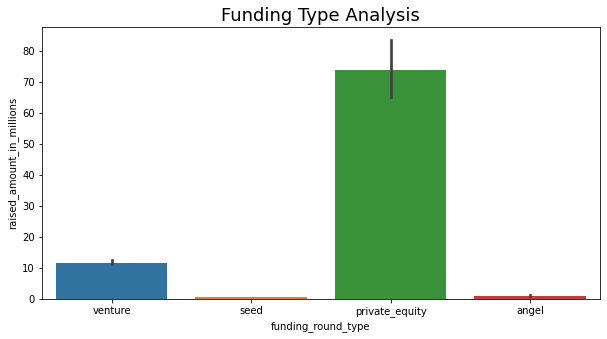

In [108]:
## Funding type vs raised amount in millions
plt.figure(figsize=(10,5))
master_frame_ft["raised_amount_in_millions"] = master_frame_ft["raised_amount_usd"].apply(lambda x: round(x/1000000,2))
g=sns.barplot(x='funding_round_type', y='raised_amount_in_millions', data=master_frame_ft)
g.set_title('Funding Type Analysis',fontsize =18)
plt.show()

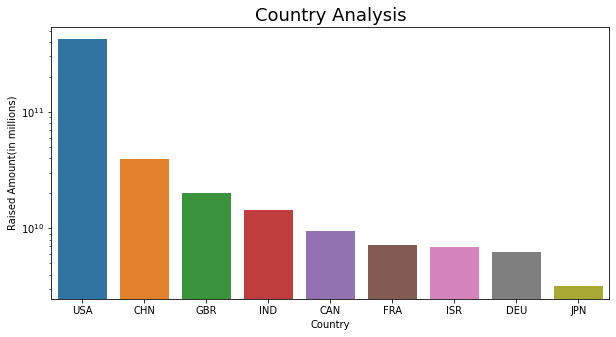

In [109]:
## Top 9 Countries vs total raised amount in USD
top9['country_code']=top9['country_code'].astype('string')
plt.figure(figsize=(10,5))
x=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum)
x.set_yscale('log')
x.set(xlabel='Country', ylabel='Raised Amount(in millions)')
x.set_title('Country Analysis',fontsize =18)
plt.show()

In [110]:
df

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector,raised_amount_in_millions
6,/organization/accompany,ACCOMPANY,operating,USA,/funding-round/5487aebe83d68e93df681fd2af148f3e,venture,16-06-2014,5600000.0,3d,Manufacturing,5.60
7,/organization/accompany,ACCOMPANY,operating,USA,/funding-round/b17ddae77db3a42e95c3747c1eaff7ab,venture,19-11-2014,15000000.0,3d,Manufacturing,15.00
10,/organization/atheer-labs,ATHEER LABS,operating,USA,/funding-round/421a7fd81521326fd83a2aefc80e3a77,venture,03-08-2015,9058298.0,3d,Manufacturing,9.06
15,/organization/dual-aperture-international-inc-,"DUAL APERTURE INTERNATIONAL, INC.",operating,USA,/funding-round/61950b6482e9e7ef555e87b81826c62f,venture,19-11-2014,5700000.0,3d,Manufacturing,5.70
17,/organization/floored,FLOORED,operating,USA,/funding-round/6232dbd23bceb853204db42d70b1921a,venture,19-12-2013,5260000.0,3d,Manufacturing,5.26
...,...,...,...,...,...,...,...,...,...,...,...
38771,/organization/zetera,ZETERA,operating,USA,/funding-round/59c6e0a593d46dbf22368237563c4d45,venture,10-05-2005,13500000.0,web hosting,Others,13.50
38773,/organization/keybase,KEYBASE,operating,USA,/funding-round/18004f2e94ef51adb4189830a8f3c928,venture,15-07-2015,10800000.0,web tools,Others,10.80
38775,/organization/beam-suntory,BEAM SUNTORY,operating,USA,/funding-round/be51308b394eb4229f311c8c41ce22a6,venture,21-11-2006,5170000.0,wine and spirits,Entertainment,5.17
38777,/organization/legra-systems-inc,LEGRA SYSTEMS,acquired,USA,/funding-round/1a38fd033526213e599c7112bac06f71,venture,01-12-2003,12000000.0,wireless,Entertainment,12.00


In [111]:
## Get top3 sector by each country
df_grouped=df.groupby(['country_code', 'sector']).raised_amount_in_millions.agg(['count', 'sum']).sort_values(['country_code','count'],ascending=False)
df_top3 = df_grouped.groupby('country_code').head(3)
df_top3.reset_index(inplace=True)
#rename sum column to Total investment colums
df_top3.rename(columns={'sum': 'Total Amount Received (USD in Millions)','count':'Total Investments'}, inplace=True)
df_top3

,country_code,sector,Total Investments,Total Amount Received (USD in Millions)
0,USA,Others,2950,26321.01
1,USA,"Social, Finance, Analytics, Advertising",2714,23807.38
2,USA,Cleantech / Semiconductors,2350,21633.45
3,IND,Others,110,1013.41
4,IND,"Social, Finance, Analytics, Advertising",60,550.55
5,IND,"News, Search and Messaging",52,433.84
6,GBR,Others,147,1283.65
7,GBR,"Social, Finance, Analytics, Advertising",133,1089.39
8,GBR,Cleantech / Semiconductors,130,1163.97


In [112]:
df_top3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_code                             9 non-null      object 
 1   sector                                   9 non-null      object 
 2   Total Investments                        9 non-null      int64  
 3   Total Amount Received (USD in Millions)  9 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 280.0+ bytes


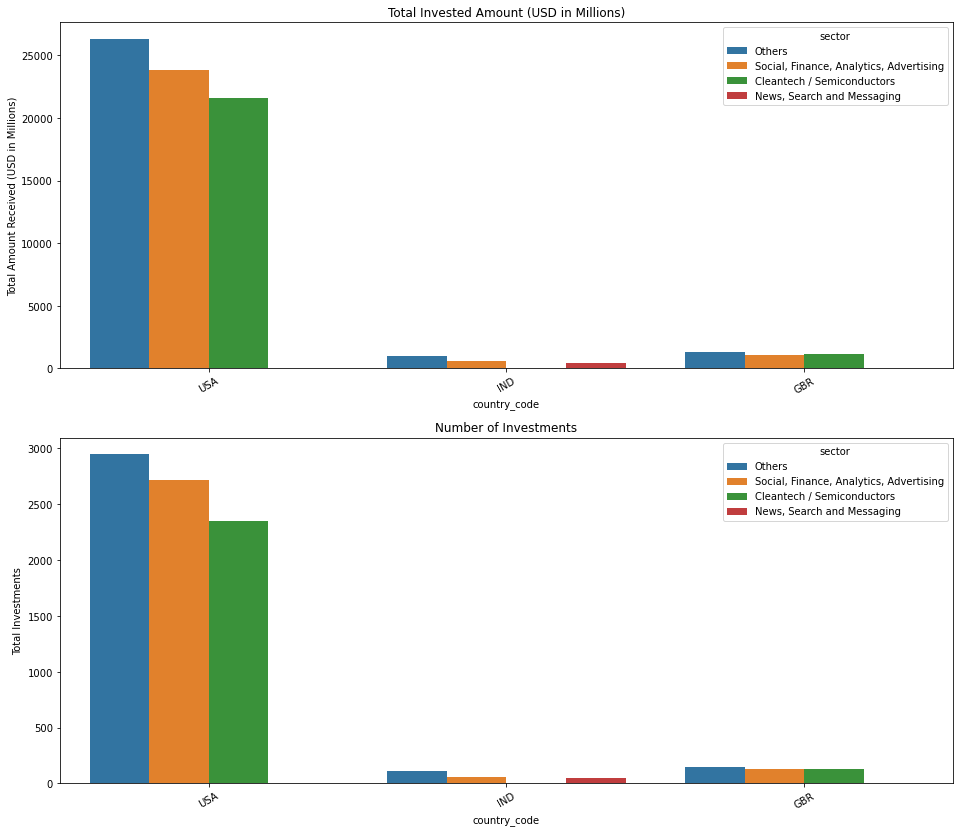

In [113]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='country_code', y='Total Amount Received (USD in Millions)', hue='sector', data=df_top3, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD in Millions)')

plt.subplot(2, 1, 2)
q = sns.barplot(x='country_code',y='Total Investments' , hue='sector', data=df_top3,estimator=np.sum)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
q.set(ylabel='Total Investments')
plt.title('Number of Investments')


plt.show()

In [114]:
## Trying again by removing the others sector
df_grouped.reset_index(inplace=True)
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  24 non-null     object 
 1   sector        24 non-null     object 
 2   count         24 non-null     int64  
 3   sum           24 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 640.0+ bytes


In [115]:
df_grouped = df_grouped[df_grouped.sector!='Others']

In [116]:
df_grouped.sector

1     Social, Finance, Analytics, Advertising
2                  Cleantech / Semiconductors
3                  News, Search and Messaging
4                                      Health
5                               Manufacturing
6                               Entertainment
7                         Automotive & Sports
9     Social, Finance, Analytics, Advertising
10                 News, Search and Messaging
11                              Entertainment
12                              Manufacturing
13                 Cleantech / Semiconductors
14                                     Health
15                        Automotive & Sports
17    Social, Finance, Analytics, Advertising
18                 Cleantech / Semiconductors
19                 News, Search and Messaging
20                              Entertainment
21                              Manufacturing
22                                     Health
23                        Automotive & Sports
Name: sector, dtype: object

In [117]:
df_top3 = df_grouped.groupby('country_code').head(3)
df_top3.reset_index(inplace=True)
df_top3

,index,country_code,sector,count,sum
0,1,USA,"Social, Finance, Analytics, Advertising",2714,23807.38
1,2,USA,Cleantech / Semiconductors,2350,21633.45
2,3,USA,"News, Search and Messaging",1583,13971.54
3,9,IND,"Social, Finance, Analytics, Advertising",60,550.55
4,10,IND,"News, Search and Messaging",52,433.84
5,11,IND,Entertainment,33,280.83
6,17,GBR,"Social, Finance, Analytics, Advertising",133,1089.39
7,18,GBR,Cleantech / Semiconductors,130,1163.97
8,19,GBR,"News, Search and Messaging",73,615.75


In [118]:
## Plotting after removing the others sector

#rename sum column to Total investment colums
df_top3.rename(columns={'sum': 'Total Amount Received (USD)'}, inplace=True)


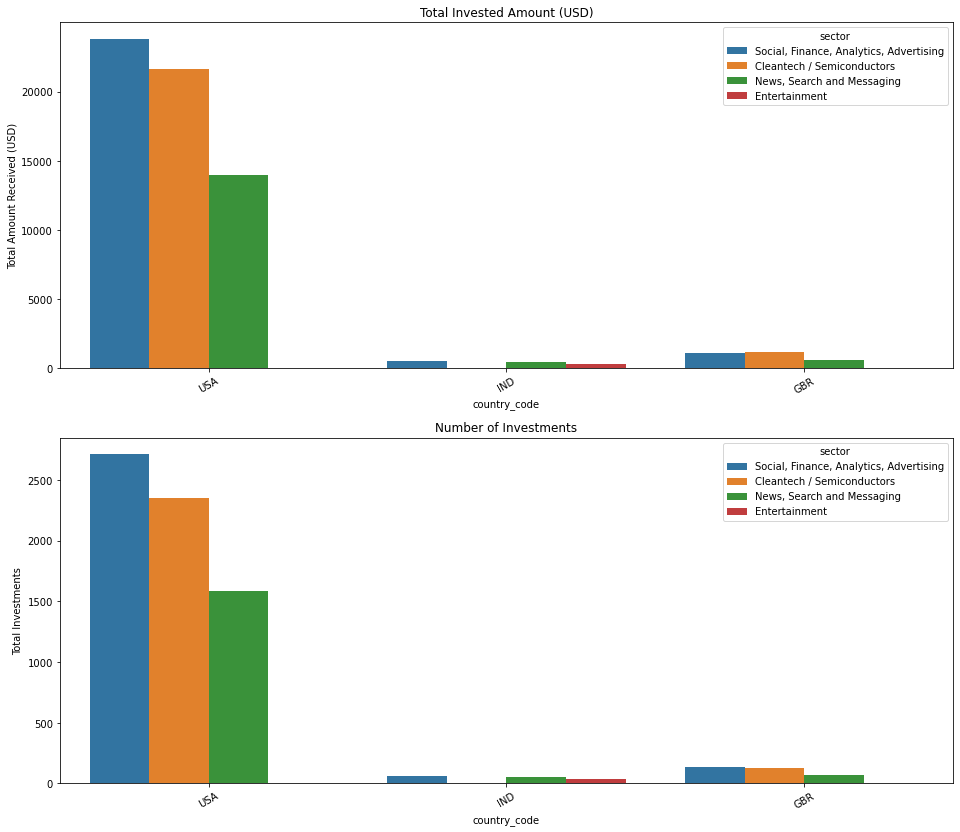

In [119]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='country_code', y='Total Amount Received (USD)', hue='sector', data=df_top3, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.barplot(x='country_code',y='count' , hue='sector', data=df_top3,estimator=np.sum)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
q.set(ylabel='Total Investments')
plt.title('Number of Investments')


plt.show()